<a href="https://colab.research.google.com/github/Dsky0204/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction_REGG_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name-Akash Hemant Jadhav**

# **<font color='red'>Project Title : Seoul Bike Sharing Demand Prediction**

#<font color='Blue'> <b> Problem Statement </b>

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


##<font color='red'> **Let's Go.....**

In [6]:
#import library and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import drive
from google.colab import drive 

In [7]:
#mount drive
drive.mount('/content/MyDrive')

#import file and encoded
df=pd.read_csv('/content/MyDrive/MyDrive/Project /SeoulBikeData.csv',encoding="latin1") 

Drive already mounted at /content/MyDrive; to attempt to forcibly remount, call drive.mount("/content/MyDrive", force_remount=True).


In [8]:
#to show top 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **<font color='red'>1.Data Summary Data Cleaning**

In [9]:
#to get information abot datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

##1.Data Description

#### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### <b>Attribute Information: </b>

* ### Date : year-month-day. (Categorical)
* ### Rented Bike count - Count of bikes rented at each hour. (Interger)
* ### Hour - Hour of he day. (Interger)
* ### Temperature-Temperature in Celsius. (Float)
* ### Humidity - %. (Interger)
* ### Windspeed - m/s. (Float)
* ### Visibility - 10m. (Interger)
* ### Dew point temperature - Celsius. (Float)
* ### Solar radiation - MJ/m2. (Float)
* ### Rainfall - mm. (Float)
* ### Snowfall - cm. (Float)
* ### Seasons - Winter, Spring, Summer, Autumn. (Categorical)
* ### Holiday - Holiday/No holiday. (Categorical)
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours). (Categorical)

# 2.Change datatype

In [10]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])

# 3.Find numerical and categorical variables for better visualization. 

a)all columns

In [11]:
#To show all column names
column_names=df.columns 
print("Count of all variables : {}".format(len(column_names)))    
column_names

Count of all variables : 14


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

b)numerical columns

In [12]:
#To show numerical column names
numerical_features=df.describe().columns 
print("Count of numerical variables : {}".format(len(numerical_features)))  
numerical_features

Count of numerical variables : 10


Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

Discrete features:

In [13]:
#discrete columns which have unique value count less than 30
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<30]
print("Count of discrete numerical variables : {}".format(len(discrete_feature))) 
discrete_feature

Count of discrete numerical variables : 1


['Hour']

Continuous features:

In [14]:
#continuous columns which have unique value count greater than 30
continous_feature=[feature for feature in numerical_features if len(df[feature].unique())>30]
print("Count of continous numerical variables : {}".format(len(continous_feature)))
continous_feature

Count of continous numerical variables : 9


['Rented Bike Count',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

c)categorical columns

In [15]:
#To show categorical column names
categorical_features = df.describe(include=['object','category']).columns    
print("Count of categorical variables : {}".format(len(categorical_features)))
categorical_features 

Count of categorical variables : 3


Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

d)datetime columns

In [16]:
#datetime features
date_feature=[fea for fea in column_names if fea not in numerical_features and fea not in categorical_features]
print("Count of datetime variables : {}".format(len(date_feature)))
date_feature

Count of datetime variables : 1


['Date']

## 4.Summery of dataset

In [17]:
#give brief summery of dataset including numerical variables only
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [18]:
#size of dataframe
df.shape

(8760, 14)

# 5.Handling missing values

In [19]:
#count of null values in each variable
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no null values present in dataframe.

# <font color='red'> **Data Visualization**

# 1.Distribution of output variable

Text(0.5, 1.0, 'Rented Bike Count Vs Density of Rented Bike Count ')

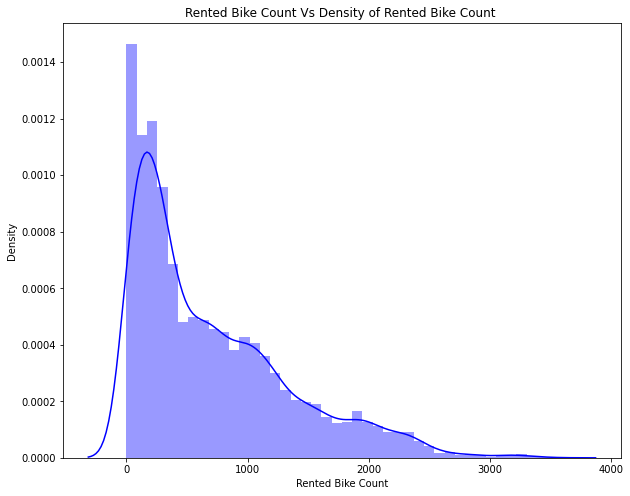

In [20]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(10,8))
sns.distplot(df['Rented Bike Count'],color="b")
plt.title("Rented Bike Count Vs Density of Rented Bike Count ")

# 2.Correlation

Text(0.5, 1.0, 'Correlation of input variables to output variable')

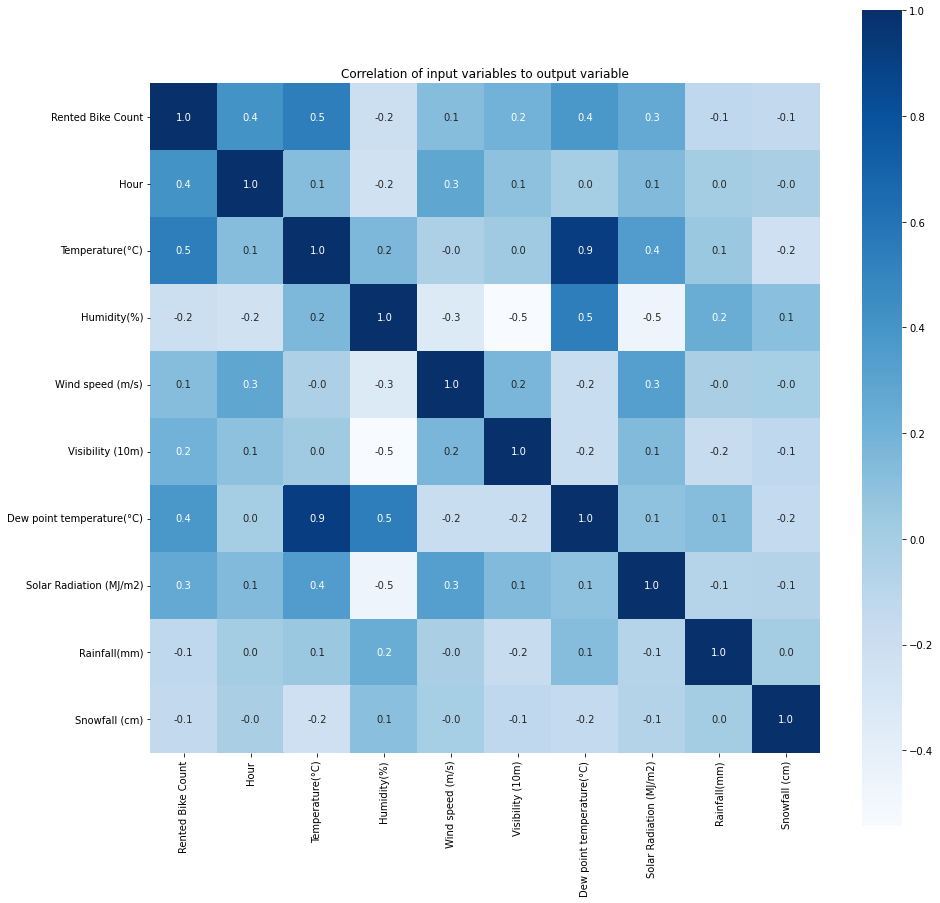

In [21]:
correalation=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correalation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":10}, cmap="Blues")
plt.title("Correlation of input variables to output variable")

# 3.Distribution of continuous variables(On the basis of "Seasons")

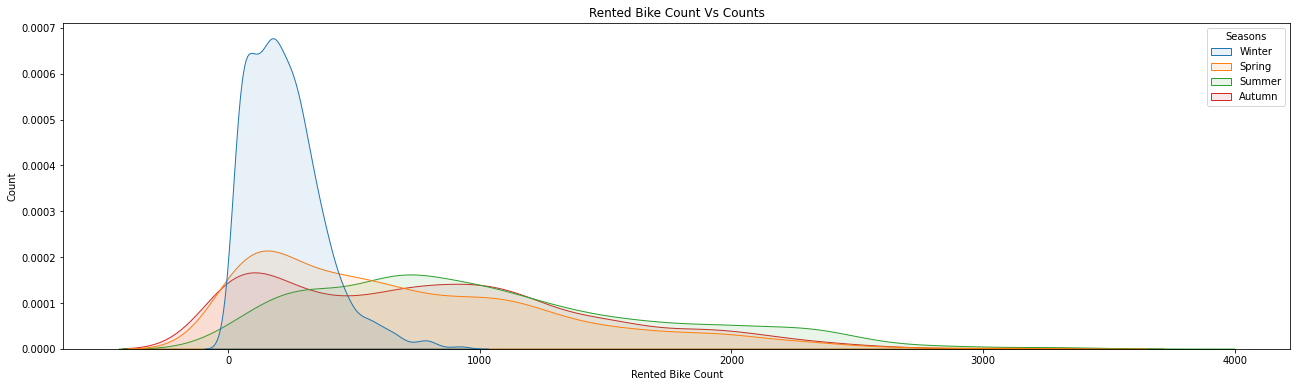

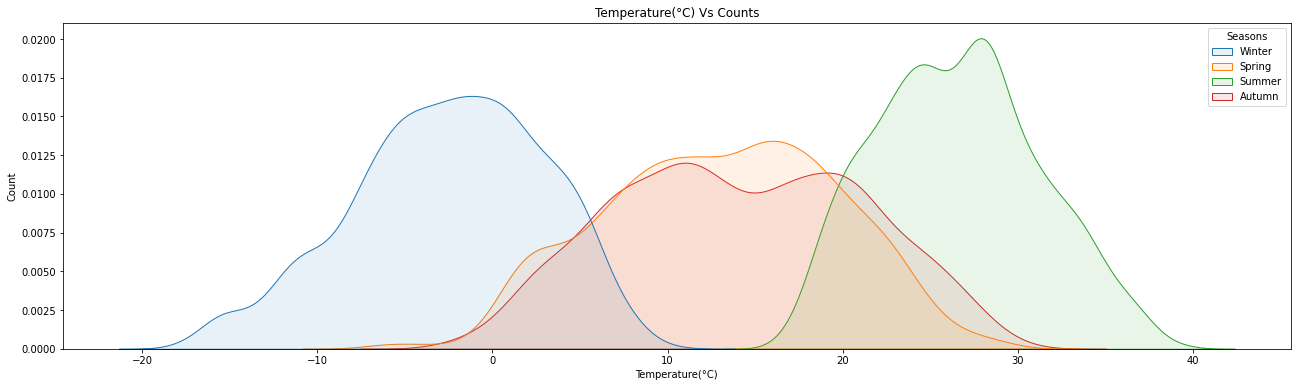

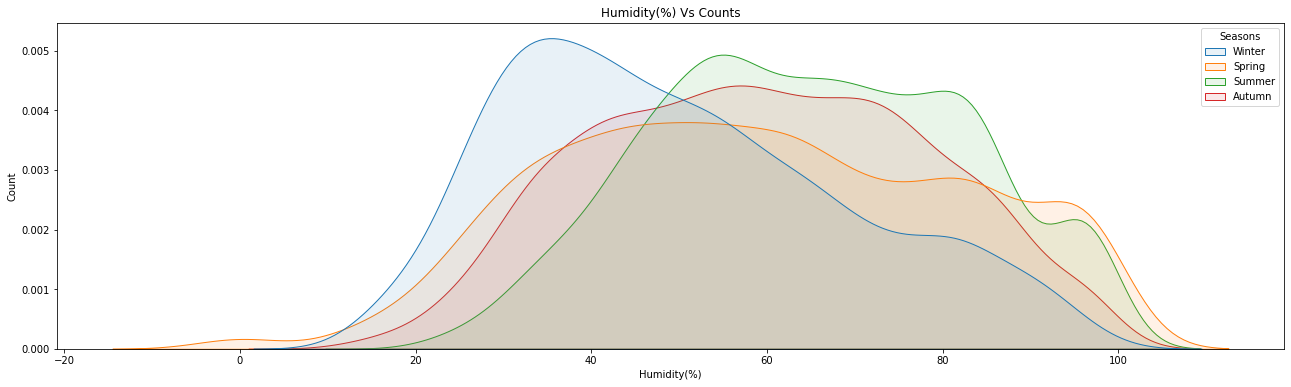

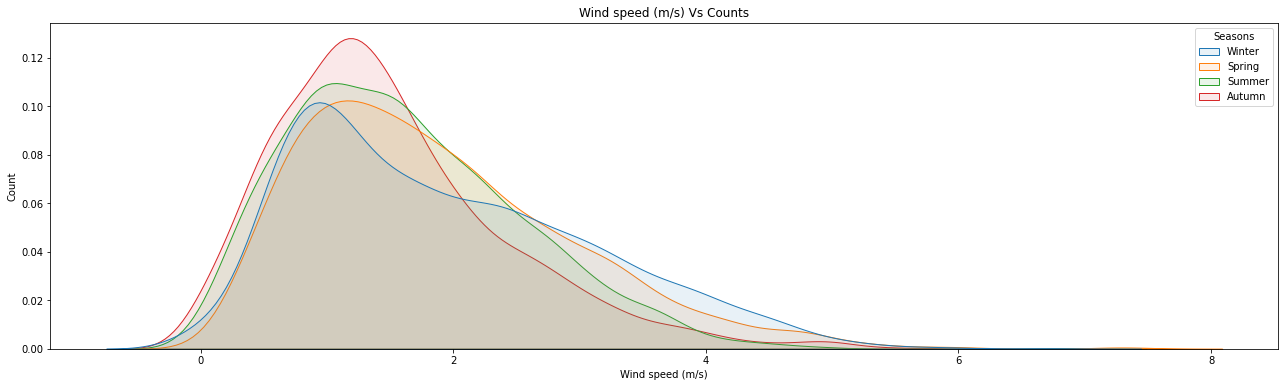

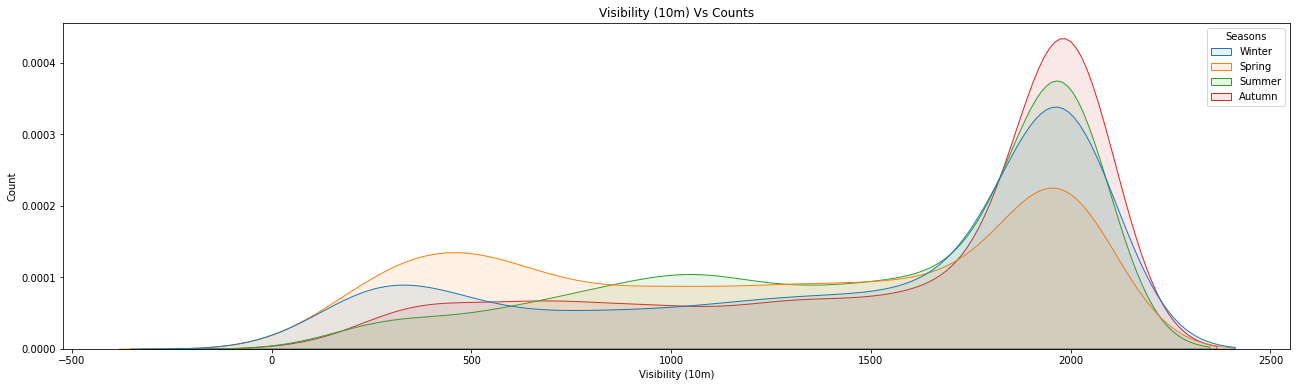

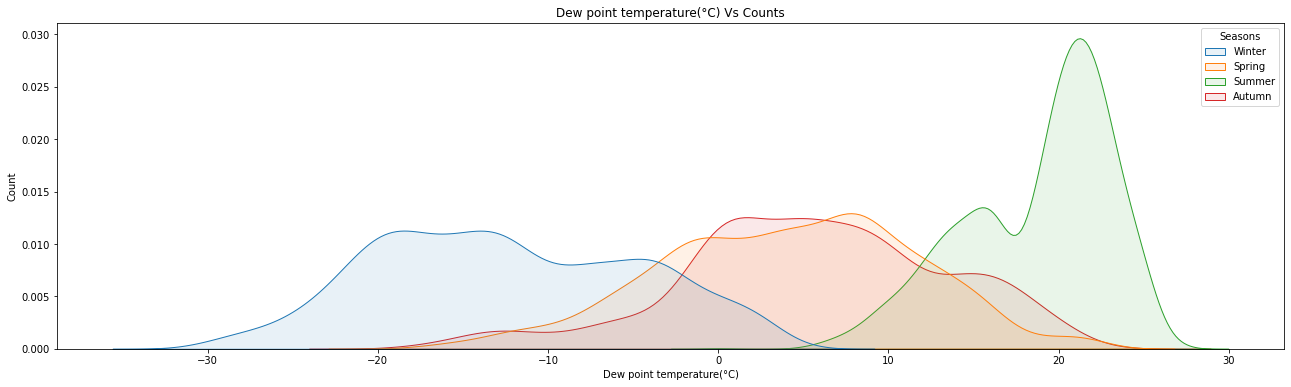

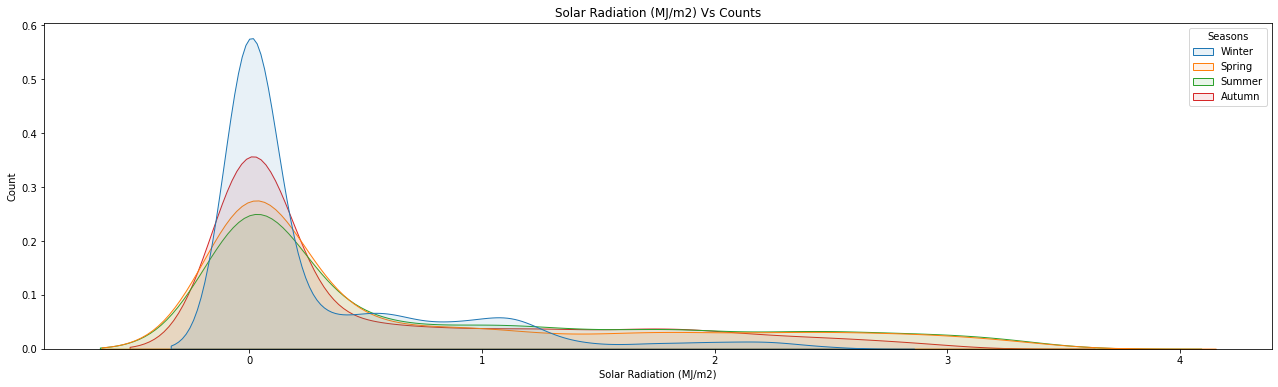

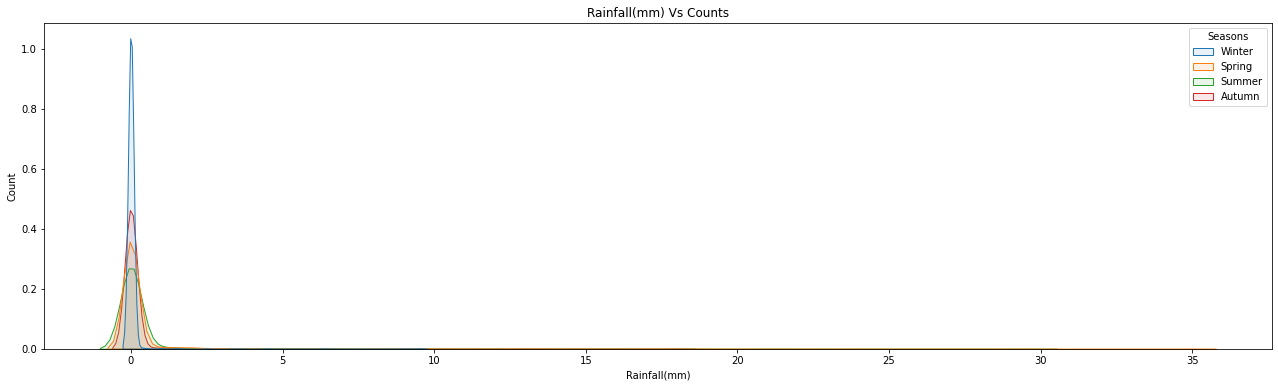

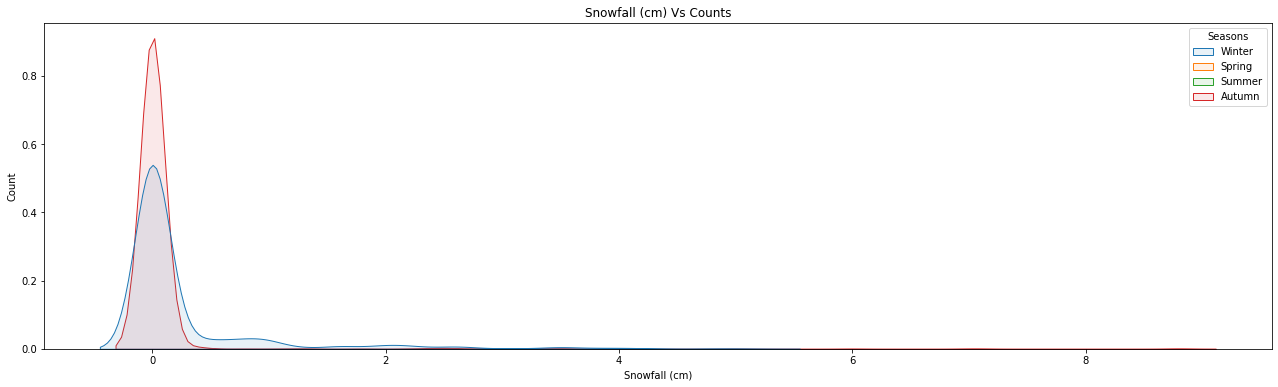

In [22]:
#density and count plot on continous features on the basis of "Seasons"
for col in continous_feature:             
    plt.figure(figsize=(22, 6))  
    sns.kdeplot(data=df,x=col,hue="Seasons",alpha=0.1,shade=True)  
    plt.xlabel(col)
    plt.ylabel('Count')  
    plt.title(col+" Vs Counts")
plt.show()

# 4.Distribution of discrete variables

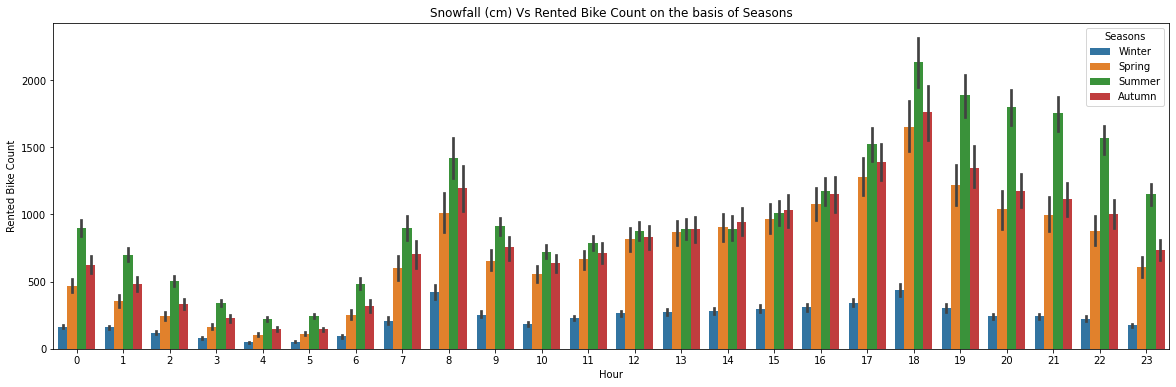

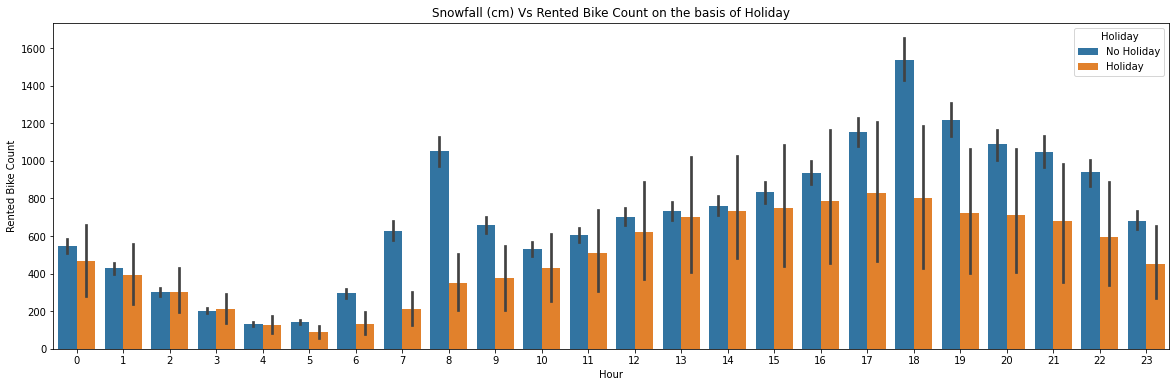

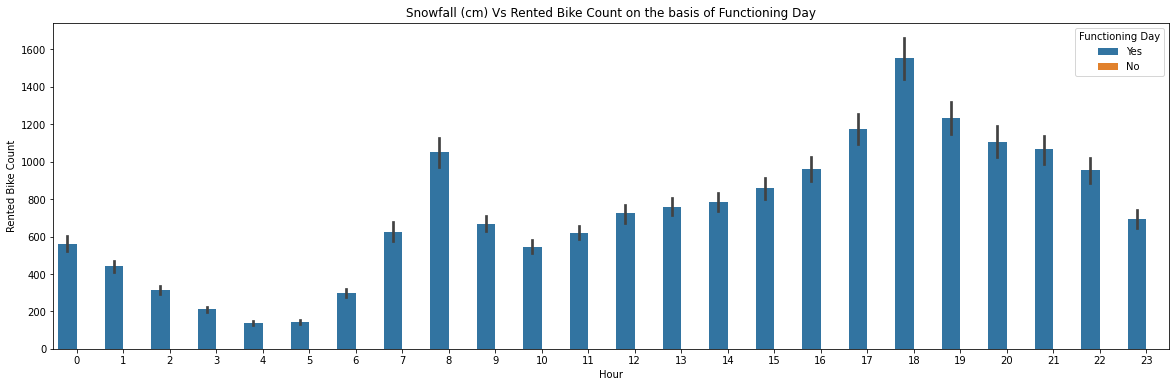

In [23]:
#bar plot on hour vs rented bike count on the basis of categorical variable 
for i in categorical_features:          
  plt.figure(figsize=(20, 6))  
  sns.barplot(x=df["Hour"],y=df["Rented Bike Count"],hue=i,data=df)  
  plt.xlabel("Hour")
  plt.ylabel('Rented Bike Count')  
  plt.title(col+" Vs Rented Bike Count on the basis of {}".format(i))
plt.show()

Here we seen that, Hour 8,17,18,19,20 means at 8AM,5PM,6PM,7PM,8PM demand of bikes is quite high.

# 5.Distribution of categorical variables

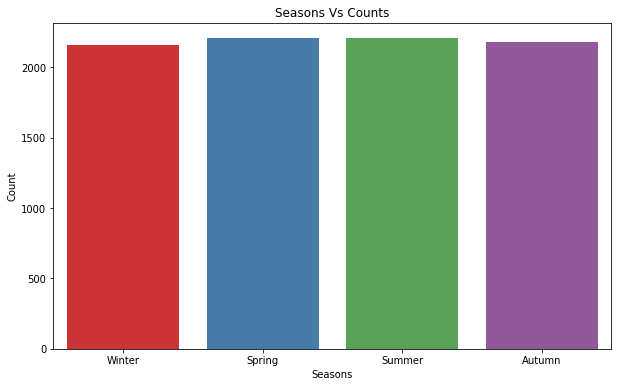

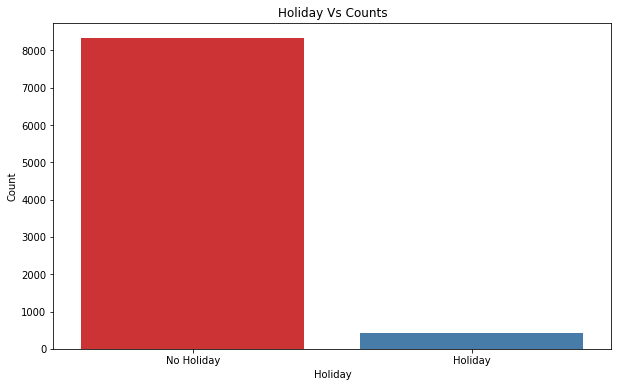

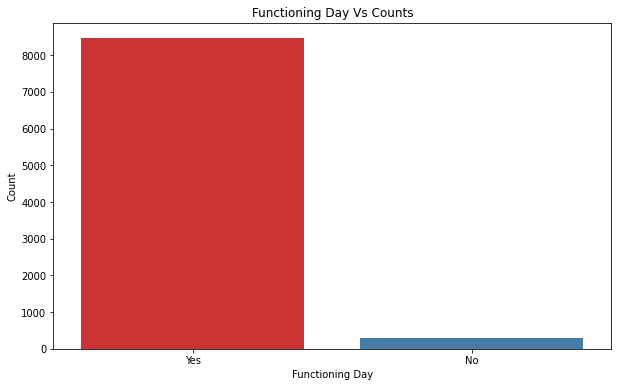

In [24]:
#to plot count of categorical featuers
for col in categorical_features:             
    plt.figure(figsize=(10, 6))  
    sns.countplot(data=df,x=col,palette=sns.color_palette("Set1"))  
    plt.xlabel(col)
    plt.ylabel('Count')  
    plt.title(col+" Vs Counts")
plt.show()

# 6.To check dataset is linear or non linear(Numerical Featuers)

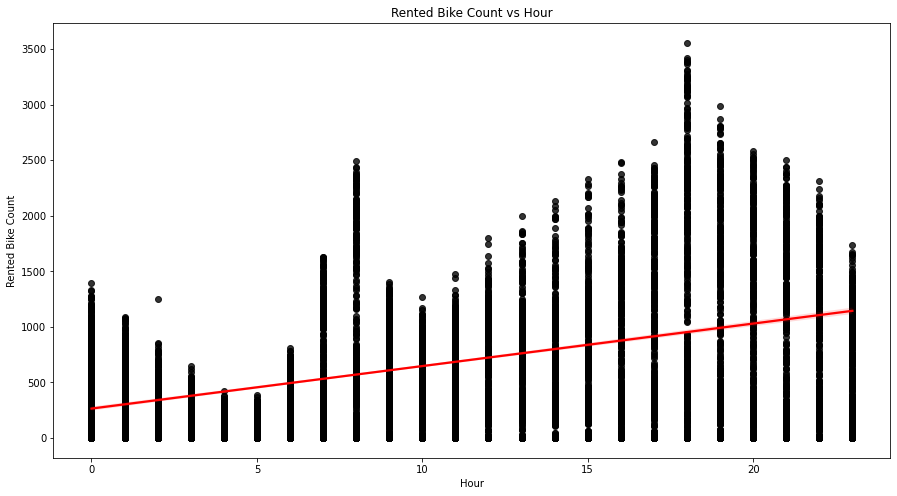

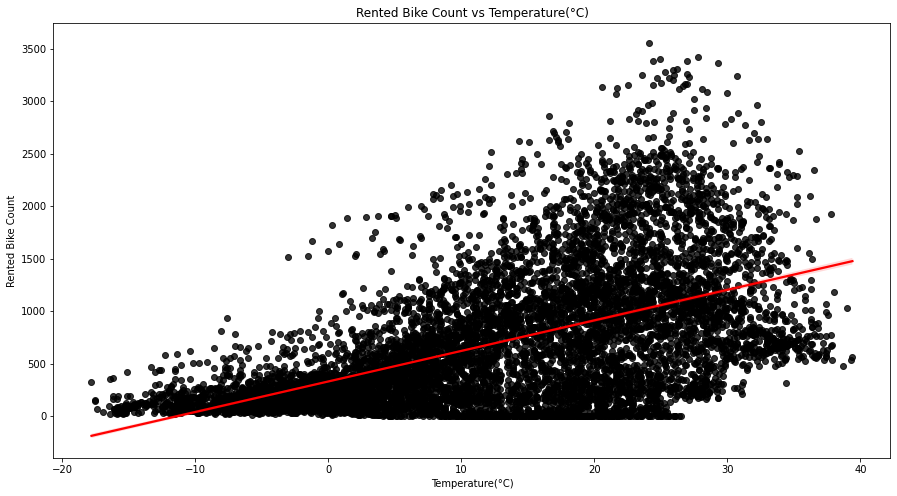

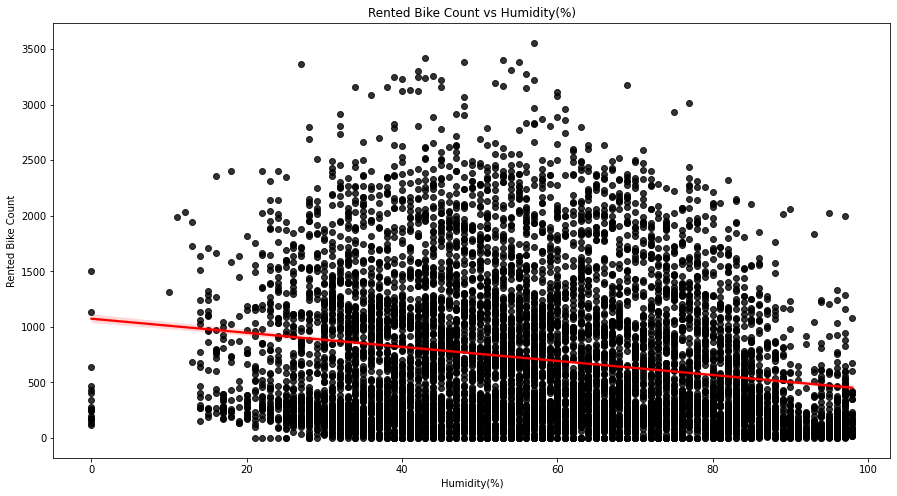

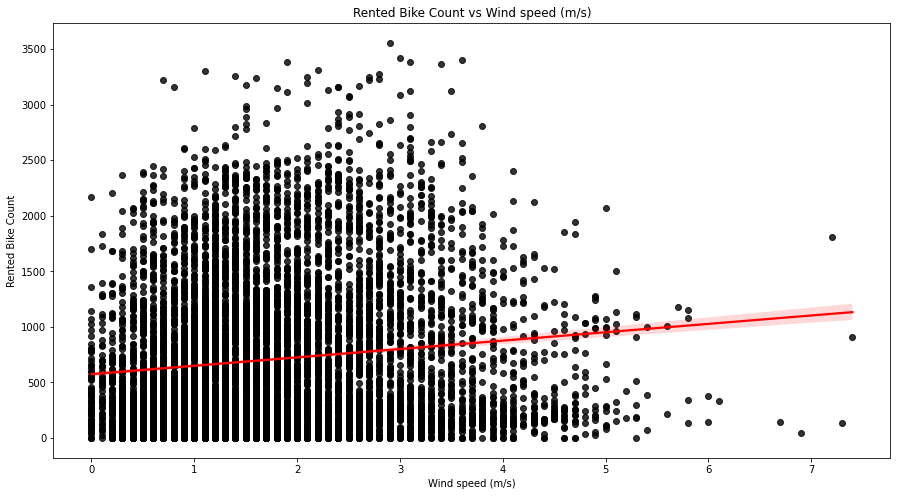

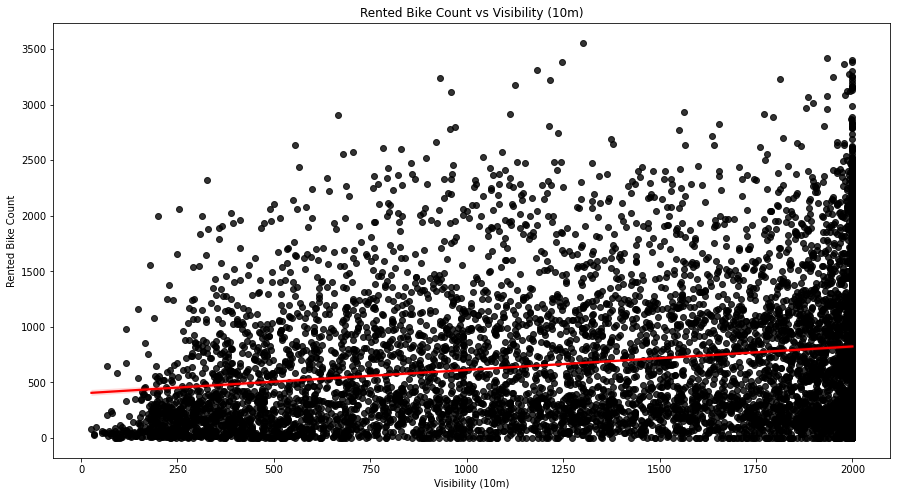

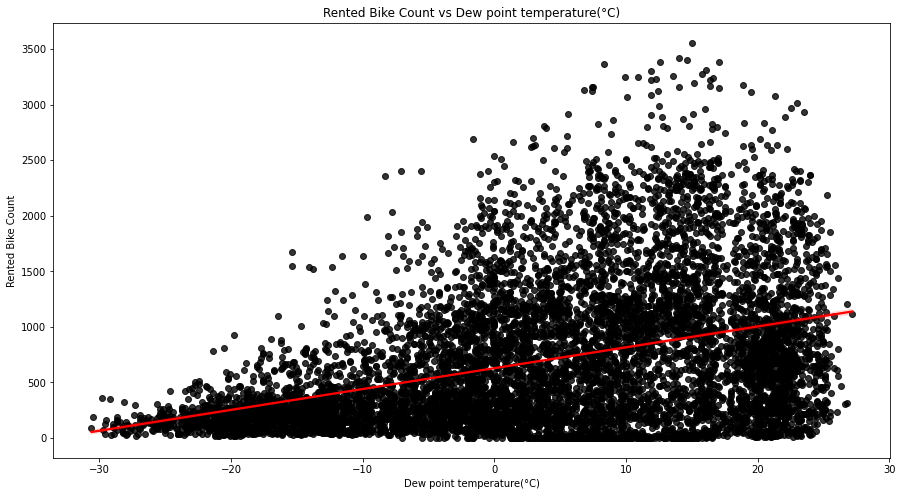

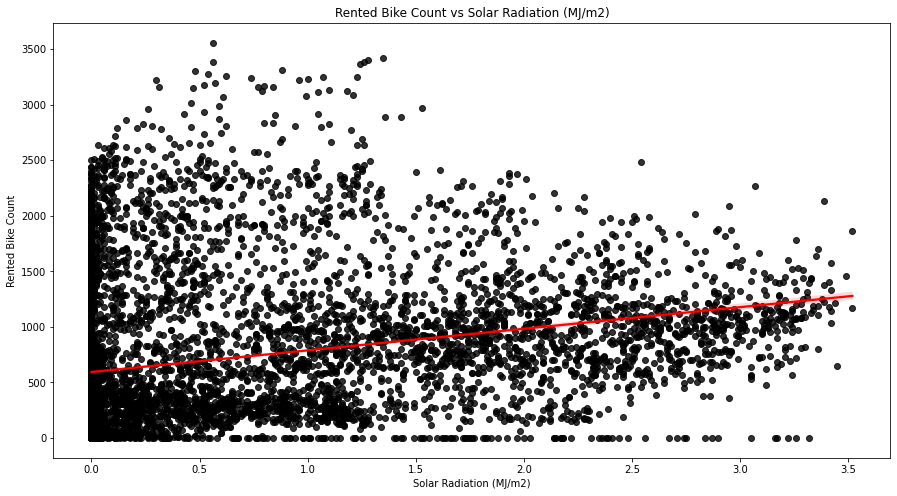

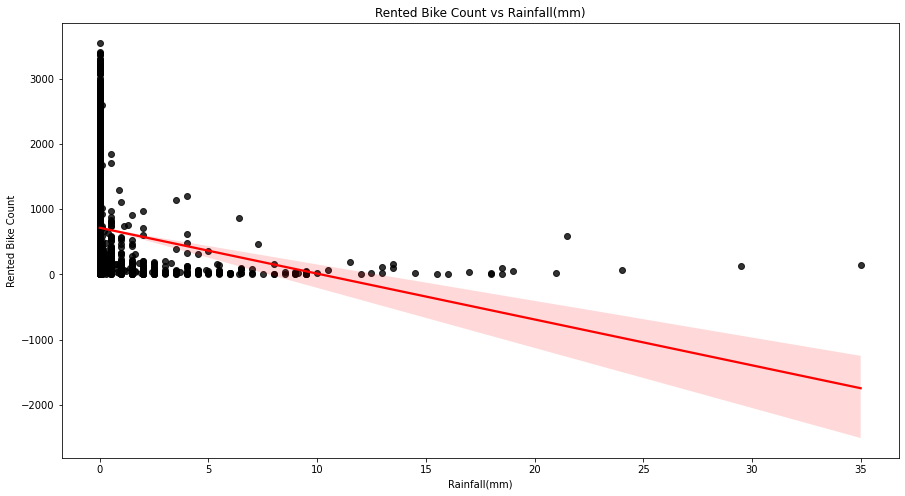

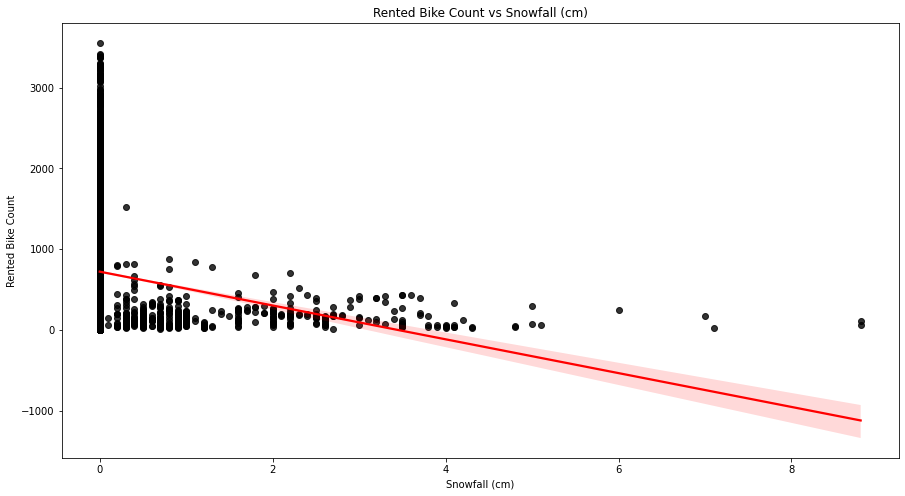

In [25]:
#regression plot to find linearity of data
for col in numerical_features[1:]:
    plt.figure(figsize=(15, 8))
    label = df['Rented Bike Count']
    sns.regplot(data=df,x=col,y="Rented Bike Count",scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    plt.title('Rented Bike Count vs ' + col )
  
plt.show()

# 7.Grouped by all categorical values

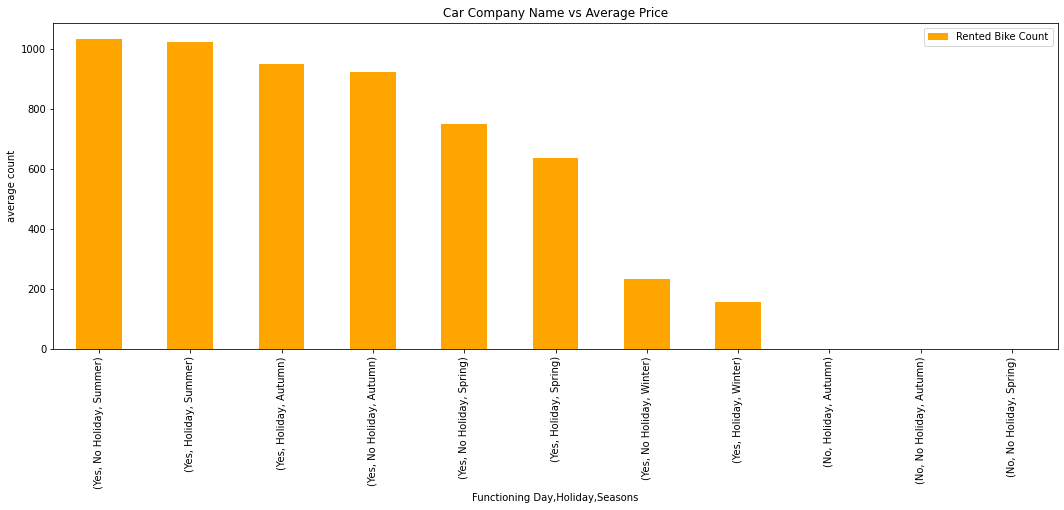

In [26]:
#Grouped by all categorical values
df_autox = pd.DataFrame(df.groupby(['Functioning Day','Holiday','Seasons'])['Rented Bike Count'].mean().sort_values(ascending = False)) 
df_autox.plot.bar(color="orange",figsize=(18,6))
plt.ylabel("average count")
plt.title('Car Company Name vs Average Price')
plt.show()

# 8.visualization with datetime variable

In [27]:
#to find dates which having demand of high bike count
date_df=pd.DataFrame(df.groupby("Date")["Rented Bike Count"].sum())

#find to 5 dates which having highest number of demand of bikes
top_5=date_df.nlargest(5,"Rented Bike Count")
top_5=top_5.reset_index()
top_5

,Date,Rented Bike Count
0,2018-06-13,36149
1,2018-06-19,35349
2,2018-08-06,35103
3,2018-06-20,34639
4,2018-06-21,34621


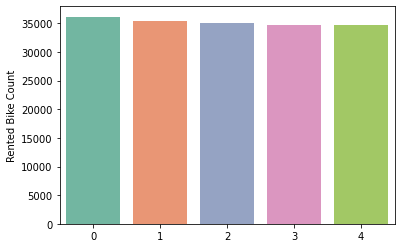

In [28]:
#bar plot : show highest number of bike demand by means of date
sns.barplot(top_5.index,top_5["Rented Bike Count"],palette=sns.color_palette("Set2"))

**Here is top five dates which have number of rented bike count is more.So we find out all information regarding these days to help to predict output by any other dataset.**

In [29]:
#Date="2018-06-13"
df[df["Date"]=="2018-06-13"].reset_index()

,index,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,4656,2018-06-13,1274,0,19.3,76,1.2,1968,14.9,0.00,0.0,0.0,Summer,No Holiday,Yes
1,4657,2018-06-13,1088,1,18.9,77,0.7,1987,14.7,0.00,0.0,0.0,Summer,No Holiday,Yes
2,4658,2018-06-13,847,2,18.4,75,0.6,1986,13.8,0.00,0.0,0.0,Summer,No Holiday,Yes
3,4659,2018-06-13,591,3,18.5,73,1.0,1951,13.5,0.00,0.0,0.0,Summer,No Holiday,Yes
4,4660,2018-06-13,421,4,18.7,74,0.9,1933,13.9,0.00,0.0,0.0,Summer,No Holiday,Yes
5,4661,2018-06-13,290,5,18.6,76,0.4,1957,14.2,0.00,0.0,0.0,Summer,No Holiday,Yes
6,4662,2018-06-13,416,6,18.7,75,0.9,1923,14.1,0.06,0.0,0.0,Summer,No Holiday,Yes
7,4663,2018-06-13,657,7,19.4,69,0.3,1277,13.5,0.42,0.0,0.0,Summer,No Holiday,Yes
8,4664,2018-06-13,959,8,20.7,65,1.5,1004,13.8,0.97,0.0,0.0,Summer,No Holiday,Yes
9,4665,2018-06-13,1111,9,22.6,59,1.6,1030,14.1,1.80,0.0,0.0,Summer,No Holiday,Yes


In [30]:
#date="2018-06-19"
df[df["Date"]=="2018-06-19"].reset_index()

,index,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,4800,2018-06-19,1055,0,21.5,63,1.0,1740,14.1,0.00,0.0,0.0,Summer,No Holiday,Yes
1,4801,2018-06-19,766,1,20.9,66,0.8,1528,14.3,0.00,0.0,0.0,Summer,No Holiday,Yes
2,4802,2018-06-19,527,2,20.2,71,1.2,1414,14.7,0.00,0.0,0.0,Summer,No Holiday,Yes
3,4803,2018-06-19,369,3,19.9,69,1.4,1179,14.0,0.00,0.0,0.0,Summer,No Holiday,Yes
4,4804,2018-06-19,268,4,19.7,73,1.6,848,14.7,0.00,0.0,0.0,Summer,No Holiday,Yes
5,4805,2018-06-19,317,5,19.4,77,0.8,831,15.2,0.00,0.0,0.0,Summer,No Holiday,Yes
6,4806,2018-06-19,746,6,19.1,75,0.4,1039,14.5,0.08,0.0,0.0,Summer,No Holiday,Yes
7,4807,2018-06-19,1616,7,19.9,72,0.6,840,14.6,0.32,0.0,0.0,Summer,No Holiday,Yes
8,4808,2018-06-19,2430,8,21.1,66,1.0,797,14.4,0.62,0.0,0.0,Summer,No Holiday,Yes
9,4809,2018-06-19,1381,9,22.4,62,0.9,761,14.7,0.93,0.0,0.0,Summer,No Holiday,Yes


In [31]:
#Date="2018-08-06"
df[df["Date"]=="2018-08-06"].reset_index()

,index,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,4536,2018-08-06,926,0,19.1,82,2.2,874,15.9,0.00,0.0,0.0,Summer,No Holiday,Yes
1,4537,2018-08-06,769,1,18.8,84,1.7,658,16.0,0.00,0.0,0.0,Summer,No Holiday,Yes
2,4538,2018-08-06,525,2,18.6,84,2.5,619,15.8,0.00,0.0,0.0,Summer,No Holiday,Yes
3,4539,2018-08-06,365,3,18.6,83,2.9,889,15.6,0.00,0.0,0.0,Summer,No Holiday,Yes
4,4540,2018-08-06,255,4,18.5,82,2.0,1072,15.3,0.00,0.0,0.0,Summer,No Holiday,Yes
5,4541,2018-08-06,299,5,18.6,81,0.8,1205,15.2,0.00,0.0,0.0,Summer,No Holiday,Yes
6,4542,2018-08-06,744,6,18.8,78,2.0,1259,14.8,0.01,0.0,0.0,Summer,No Holiday,Yes
7,4543,2018-08-06,1544,7,19.1,73,2.0,1300,14.1,0.30,0.0,0.0,Summer,No Holiday,Yes
8,4544,2018-08-06,2348,8,19.7,69,2.0,1448,13.8,0.54,0.0,0.0,Summer,No Holiday,Yes
9,4545,2018-08-06,1283,9,21.2,62,1.7,1384,13.6,1.45,0.0,0.0,Summer,No Holiday,Yes


**From above 3 datasets we conclude that highest number of bikes demand on:**

 1)Functional day- Yes

 2)No holiday- Yes

 3)Season-Summer

 4)Rainfall- 0 

 5)Snowfall- 0

 6)Wind speed- very less value

 7)Visibility- very high value

# <font color='red'>**Machine Learning Algorithm**

**Hence we conclude that,this is non-linear regression so use "RandomForestRegressor" regression aloritham and to find number of bikes required for each hour.**

In [32]:
#make dependent and independent variable datasets 
x=df.copy()
x=x.drop(['Date',"Rented Bike Count"],axis=1) #Drop "Date" column which is not required for regression and drop dependent column.
y=df["Rented Bike Count"]

# 1.Feature encoding

In [33]:
#Create dummy columns of independent variables
x=pd.get_dummies(x,columns=["Seasons","Holiday","Functioning Day"],prefix=["Seasons","Holiday","Fun_day"])

# 2.Train Test split

In [34]:
#train-test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.3, random_state =10)  #Train data=70% and Test data=30%
print(X_train.shape)
print(X_test.shape)

(6132, 17)
(2628, 17)


In [35]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Fun_day_No,Fun_day_Yes
2863,7,10.5,70,1.1,483,5.2,0.04,0.0,0.0,0,1,0,0,0,1,0,1
6985,1,19.3,71,0.4,1912,13.9,0.00,0.0,0.0,1,0,0,0,0,1,1,0
3060,12,6.0,23,4.2,1990,-13.6,2.00,0.0,0.0,0,1,0,0,0,1,0,1
7767,15,21.3,24,1.5,1832,-0.1,1.91,0.0,0.0,1,0,0,0,0,1,0,1
5909,5,29.2,62,2.1,1835,21.1,0.00,0.0,0.0,0,0,1,0,0,1,0,1


In [36]:
X_test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Fun_day_No,Fun_day_Yes
389,5,-9.7,41,3.1,2000,-20.5,0.00,0.0,0.0,0,0,0,1,0,1,0,1
8461,13,9.9,37,2.1,1900,-4.1,1.32,0.0,0.0,1,0,0,0,0,1,0,1
3588,12,20.5,31,2.6,1299,2.7,2.79,0.0,0.0,0,1,0,0,0,1,0,1
5086,22,23.4,88,0.9,1153,21.2,0.00,0.0,0.0,0,0,1,0,0,1,0,1
3366,6,11.2,63,0.7,821,4.4,0.00,0.0,0.0,0,1,0,0,0,1,0,1


# 3.Feature Scaling

In [37]:
#Scale all values in dataframe by MinMaxScaler cause dataset contains negetive values are present
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

#fit train data
scaler.fit(X_train)

#transform train and test data
X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)


#Scaled value array coverted into dataframe
X_train_scale=pd.DataFrame(X_train_scale,columns=X_train.columns)
X_test_scale=pd.DataFrame(X_test_scale,columns=X_test.columns)

In [38]:
#train dataset after scaling
X_train_scale

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Fun_day_No,Fun_day_Yes
0,0.304348,0.492091,0.714286,0.148649,0.231120,0.619377,0.011364,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.043478,0.646749,0.724490,0.054054,0.955398,0.769896,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.521739,0.413005,0.234694,0.567568,0.994932,0.294118,0.568182,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.652174,0.681898,0.244898,0.202703,0.914850,0.527682,0.542614,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.217391,0.820738,0.632653,0.283784,0.916371,0.894464,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6127,0.217391,0.643234,0.846939,0.270270,0.217942,0.807958,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
6128,0.826087,0.608084,0.357143,0.391892,1.000000,0.553633,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6129,0.000000,0.042179,0.346939,0.229730,1.000000,0.055363,0.000000,0.0,0.056818,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
6130,0.913043,0.574692,0.408163,0.405405,1.000000,0.557093,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [39]:
#test dataset after scaling
X_test_scale

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Fun_day_No,Fun_day_Yes
0,0.217391,0.137083,0.418367,0.418919,1.000000,0.174740,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.565217,0.481547,0.377551,0.283784,0.949316,0.458478,0.375000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.521739,0.667838,0.316327,0.351351,0.644703,0.576125,0.792614,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.956522,0.718805,0.897959,0.121622,0.570705,0.896194,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.260870,0.504394,0.642857,0.094595,0.402433,0.605536,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,0.260870,0.504394,0.714286,0.121622,1.000000,0.631488,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2624,0.521739,0.746924,0.469388,0.256757,0.971110,0.745675,0.832386,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2625,0.043478,0.514938,0.612245,0.027027,0.451597,0.602076,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2626,0.782609,0.669596,0.989796,0.094595,0.098834,0.877163,0.039773,0.614286,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# 4.feature selection

In [40]:
from sklearn.feature_selection import mutual_info_regression

imp=pd.DataFrame(mutual_info_regression(X_train_scale,y_train))
imp["features"]=X_train_scale.columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

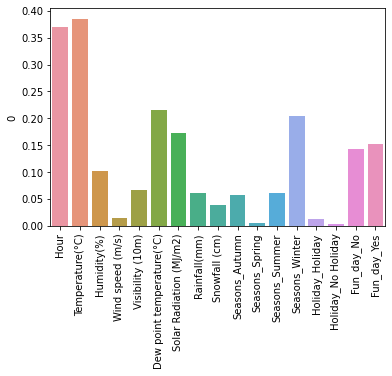

In [41]:
sns.barplot(x=x.columns,y=imp[0])
plt.xticks(rotation=90)

In [42]:
imp_features=imp[imp[0]>0.1]
imp_features

,0,features
0,0.370261,Hour
1,0.384936,Temperature(°C)
2,0.102617,Humidity(%)
5,0.214948,Dew point temperature(°C)
6,0.172936,Solar Radiation (MJ/m2)
12,0.204245,Seasons_Winter
15,0.143146,Fun_day_No
16,0.151836,Fun_day_Yes


In [43]:
X_train_final=X_train_scale[imp_features["features"]]
X_test_final=X_test_scale[imp_features["features"]]

#<font color='blue'> **RandomForestRegressor**

In [44]:
#import "RandomForestRegressor"

from sklearn.ensemble import RandomForestRegressor

In [45]:
#random forest model with n_estimator value=400
rfr=RandomForestRegressor(n_estimators=400)
#fit train data
rfr.fit(X_train_final,y_train) 

RandomForestRegressor(n_estimators=400)

In [46]:
#To find accuracy of train data
accu1=rfr.score(X_train_final,y_train)*100  
print("Accuracy score of train data {} % ".format(accu1))

#To find accuracy of test data
accu2=rfr.score(X_test_final,y_test)*100
print("Accuracy score of test data {} % ".format(accu2))

Accuracy score of train data 97.6853704849148 % 
Accuracy score of test data 84.91633646384925 % 


In [47]:
#predict values on train data
y_prd_train=rfr.predict(X_train_final)  
y_prd_train

array([752.4675,   5.785 , 674.1675, ...,  73.64  ,   0.    , 223.5325])

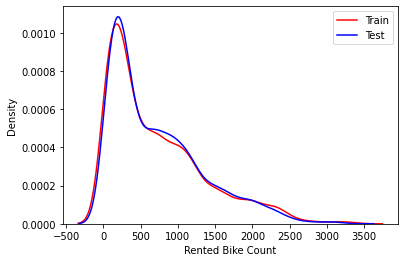

In [48]:
#plot accuracy of train data output variable and predicted output
axx=sns.distplot(y_train,hist=False,color="r")
sns.distplot(y_prd_train,hist=False,color="b",ax=axx)
plt.legend(labels=["Train","Test"])

In [49]:
#predict values
y_prd_test=rfr.predict(X_test_final)
y_prd_test

array([ 42.0025, 818.975 , 994.175 , ..., 475.6825, 245.    ,  52.28  ])

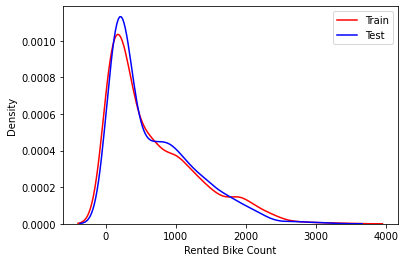

In [50]:
#plot accuracy of test data output variable and predicted output
axx1=sns.distplot(y_test,hist=False,color="r")
sns.distplot(y_prd_test,hist=False,color="b",ax=axx1)
plt.legend(labels=["Train","Test"])

In [51]:
#Cross validation 

from sklearn.model_selection import cross_val_score

In [52]:
#cross validation with random forest algorithm for train data
rf=cross_val_score(rfr,X_train_final,y_train,cv=5)   
rf.mean()*100

83.34495130275084

In [53]:
#cross validation with random forest algorithm for test data
rf1=cross_val_score(rfr,X_test_final,y_test,cv=5)  
rf1.mean()*100

82.53867118426905

# <font color='red'>**Conclusion**

1.Saperate out numerical,categorical and datetime variables for better visualization.

2.There is no null value present.

3.Output variable does not have normal distribution.

4.Correlation with output is less but "Hour","Temperature",'Dew point temperature" have good correlation value.

5.On the basis of distrution of continuous variales we find out dataset is imbalanced.

6.Regression plot shows non linearity of dataset.

7.From categorical variables we found that in which season or day demand of bikes is highest.

8.From "Date" variavle we find on which date demand of bikes is more and get all information of these dates:

 -Functional day- Yes

 -No holiday- Yes

 -Season-Summer

 -Rainfall- 0 

 -Snowfall- 0

 -Wind speed- very less value

 -Visibility- very high value

9.From visualization we found that,data is non linear.So we used "RandomForestRegressor" algoritham.

10."RandomForestRegressor" fit perfectly on given dataset

-Encoding

-Feature scaling

-Feature selection

-Train data gives accuracy about 97 percent.

-Test data gives accuracy about 85 percent.

11.For better accuracy use Cross validation but,

-train accuracy=82 percent

-test acuracy=81 percent

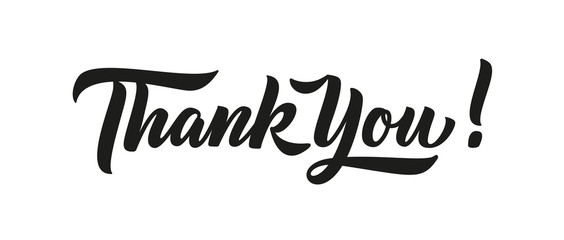